# 네번째 시도

Key Attempts:
- 감독, 배급사, 배우, 장르, 개봉월은 각 레이블의 관객수 평균값으로 치환
- 국가는 0,1 레이블 인코딩
- 감독, 배급사, 배우, 장르, 개봉월, 상영시간 normalise

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./data/join_final.csv', encoding='utf-8-sig', thousands=',')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6806 entries, 0 to 6805
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   runTm        6806 non-null   float64
 1   nation       6806 non-null   int64  
 2   genre        6806 non-null   int64  
 3   director     6806 non-null   object 
 4   actor        6806 non-null   object 
 5   is_adult     6806 non-null   float64
 6   distributor  6806 non-null   object 
 7   view         6806 non-null   int64  
 8   openMonth    6806 non-null   int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 478.7+ KB


## 1. 평균 값 치환

In [4]:
# 감독, 배우, 배급사 각각의 평균 값 테이블 만들기
director = df.groupby('director').agg({"view":"mean"}).reset_index()
actor = df.groupby('actor').agg({"view":"mean"}).reset_index()
distributor = df.groupby('distributor').agg({"view":"mean"}).reset_index()
month = df.groupby('openMonth').agg({"view":"mean"}).reset_index()
genre = df.groupby('genre').agg({"view":"mean"}).reset_index()

In [5]:
for idx, row in df.iterrows():
    act = row['actor']
    dist = row['distributor']
    dir = row['director']
    m = row['openMonth']
    g = row['genre']

    a_val = actor[actor['actor'] == act]['view'].values[0]
    df.loc[idx, 'actor'] = a_val

    dist_val = distributor[distributor['distributor'] == dist]['view'].values[0]
    df.loc[idx, 'distributor'] = dist_val

    dir_val = director[director['director'] == dir]['view'].values[0]
    df.loc[idx, 'director'] = dir_val

    m_val = month[month['openMonth'] == m]['view'].values[0]
    df.loc[idx, 'openMonth'] = m_val

    g_val = genre[genre['genre'] == g]['view'].values[0]
    df.loc[idx, 'genre'] = g_val

In [6]:
df.head()

,runTm,nation,genre,director,actor,is_adult,distributor,view,openMonth
0,136.0,2,267770.564434,1307109.25,1412308.785714,0.0,1088485.983784,1865469,740111.463320
1,119.0,3,946460.143552,7290.4,17258.0,0.0,17985.852941,24634,516172.288462
2,116.0,1,363392.038462,7678650.2,3846923.466667,1.0,1650243.296117,943241,338627.196891
3,125.0,2,682163.864078,842257.9,402432.5,0.0,40571.71123,85594,253381.393617
4,105.0,1,404595.269956,193554.0,193554.0,0.0,100373.2,193554,428123.391892


## 2. 관객 수 범주형 변환

In [7]:
for idx, row in df.iterrows():
    val = row['view']
    if val <10000:
        df.loc[idx, 'view'] = 1
    elif val <100000:
        df.loc[idx, 'view'] = 2
    elif val <200000:
        df.loc[idx, 'view'] = 3
    elif val <400000:
        df.loc[idx, 'view'] = 4
    elif val <600000:
        df.loc[idx, 'view'] = 5
    elif val <800000:
        df.loc[idx, 'view'] = 6
    elif val <1000000:
        df.loc[idx, 'view'] = 7
    else:
        df.loc[idx, 'view'] = 8

## 3. 라벨인코딩

In [8]:
y = df['view']
X = df.drop('view', axis=1)

In [9]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6806 entries, 0 to 6805
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   runTm        6806 non-null   float64
 1   nation       6806 non-null   int64  
 2   genre        6806 non-null   float64
 3   director     6806 non-null   object 
 4   actor        6806 non-null   object 
 5   is_adult     6806 non-null   float64
 6   distributor  6806 non-null   object 
 7   openMonth    6806 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 425.5+ KB


In [10]:
X = pd.get_dummies(data = X, columns=['nation'], prefix='region')

In [11]:
X.columns

Index(['runTm', 'genre', 'director', 'actor', 'is_adult', 'distributor',
       'openMonth', 'region_1', 'region_2', 'region_3'],
      dtype='object')

## 4. 데이터 스플릿

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13, stratify=y)

## 5. Normalise

In [13]:
X_train

,runTm,genre,director,actor,is_adult,distributor,openMonth,region_1,region_2,region_3
619,111.0,289994.858283,219824.0,333113.333333,0.0,729392.342105,489536.979452,1,0,0
1314,78.0,268377.978166,214097.0,32517.5,0.0,16446.8,428123.391892,0,0,1
861,98.0,264378.725424,179638.0,146660.5,1.0,843950.231293,740111.463320,0,0,1
5384,123.0,267770.564434,11067.0,11067.0,0.0,292852.492537,489536.979452,1,0,0
4283,119.0,268377.978166,44770.5,49832.0,0.0,19666.666667,253381.393617,0,0,1
...,...,...,...,...,...,...,...,...,...,...
4209,104.0,404595.269956,47923.0,1137159.5,0.0,1088485.983784,366682.466543,0,1,0
726,110.0,404595.269956,2586487.375,455980.2,0.0,843950.231293,294312.435312,1,0,0
1414,166.0,267770.564434,774578.5,845478.25,0.0,620777.25,366682.466543,0,1,0
1523,100.0,404595.269956,60219.0,391019.8,0.0,1019921.020492,366682.466543,1,0,0


In [14]:
# train data의 runTm 컬럼만 normalisation fit 적용
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()
X_train.iloc[:,0:7] = mm.fit_transform(X_train.iloc[:, 0:7])

In [15]:
X_train

,runTm,genre,director,actor,is_adult,distributor,openMonth,region_1,region_2,region_3
619,0.309091,0.102992,0.019373,0.033387,0.0,0.211470,0.485188,1,0,0
1314,0.159091,0.093575,0.018866,0.003168,0.0,0.004485,0.359012,0,0,1
861,0.250000,0.091832,0.015815,0.014643,1.0,0.244729,1.000000,0,0,1
5384,0.363636,0.093310,0.000891,0.001012,0.0,0.084732,0.485188,1,0,0
4283,0.345455,0.093575,0.003875,0.004909,0.0,0.005419,0.000000,0,0,1
...,...,...,...,...,...,...,...,...,...,...
4209,0.277273,0.152918,0.004154,0.114217,0.0,0.315723,0.232780,0,1,0
726,0.304545,0.152918,0.228899,0.045739,0.0,0.244729,0.084094,1,0,0
1414,0.559091,0.093310,0.068487,0.084894,0.0,0.179936,0.232780,0,1,0
1523,0.259091,0.152918,0.005243,0.039208,0.0,0.295817,0.232780,1,0,0


In [16]:
# test 데이터의 runTm 컬럼도 같은 minMax scaler transform
X_test.iloc[:,0:7] = mm.transform(X_test.iloc[:, 0:7])

## 6. Modelling

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr_clf = LogisticRegression(random_state=13, solver='liblinear')
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
lr_train = lr_clf.predict(X_train)

print("train accuracy : ", accuracy_score(y_train, lr_train))
print("test accuracy : ", accuracy_score(y_test, lr_pred))

train accuracy :  0.5056675062972292
test accuracy :  0.4931439764936337


In [18]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=13, max_depth=8)
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
dt_train = dt_clf.predict(X_train)

print("train accuracy : ", accuracy_score(y_train, dt_train))
print("test accuracy : ", accuracy_score(y_test, dt_pred))

train accuracy :  0.7882031905961377
test accuracy :  0.72820763956905


Feature: runTm, Score: 0.01987
Feature: genre, Score: 0.00362
Feature: director, Score: 0.70015
Feature: actor, Score: 0.23298
Feature: is_adult, Score: 0.00149
Feature: distributor, Score: 0.03400
Feature: openMonth, Score: 0.00658
Feature: region_1, Score: 0.00000
Feature: region_2, Score: 0.00000
Feature: region_3, Score: 0.00131


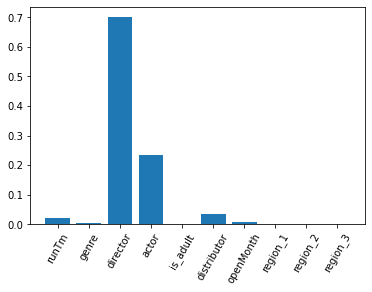

In [19]:
importance = dt_clf.feature_importances_

for i, v in enumerate(importance):
    print('Feature: %s, Score: %.5f' %(X_train.columns[i],v))

plt.bar(X_train.columns, importance)
plt.xticks(rotation=60)
plt.show()

In [20]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=13, n_jobs=-1, n_estimators=100)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
rf_train = rf_clf.predict(X_train)

print("train accuracy : ", accuracy_score(y_train, rf_train))
print("test accuracy : ", accuracy_score(y_test, rf_pred))

train accuracy :  0.9997900923593619
test accuracy :  0.7311459353574926


Feature: runTm, Score: 0.08919
Feature: genre, Score: 0.04898
Feature: director, Score: 0.35387
Feature: actor, Score: 0.26721
Feature: is_adult, Score: 0.01298
Feature: distributor, Score: 0.13759
Feature: openMonth, Score: 0.06012
Feature: region_1, Score: 0.00872
Feature: region_2, Score: 0.00816
Feature: region_3, Score: 0.01317


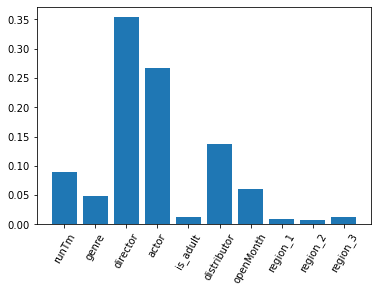

In [21]:
importance = rf_clf.feature_importances_

for i, v in enumerate(importance):
    print('Feature: %s, Score: %.5f' %(X_train.columns[i],v))

plt.bar(X_train.columns, importance)
plt.xticks(rotation=60)
plt.show()

In [22]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(random_state=13, n_jobs=-1, n_estimators=1000, num_leaves=64, boost_from_average = False)
lgbm_clf.fit(X_train, y_train)
lgbm_pred = lgbm_clf.predict(X_test)
lgbm_train = rf_clf.predict(X_train)

print("train accuracy : ", accuracy_score(y_train, lgbm_train))
print("test accuracy : ", accuracy_score(y_test, lgbm_pred))

train accuracy :  0.9997900923593619
test accuracy :  0.7179236043095005


Feature: runTm, Score: 33412.00000
Feature: genre, Score: 14561.00000
Feature: director, Score: 36773.00000
Feature: actor, Score: 39155.00000
Feature: is_adult, Score: 2143.00000
Feature: distributor, Score: 28888.00000
Feature: openMonth, Score: 17747.00000
Feature: region_1, Score: 2049.00000
Feature: region_2, Score: 2375.00000
Feature: region_3, Score: 1781.00000


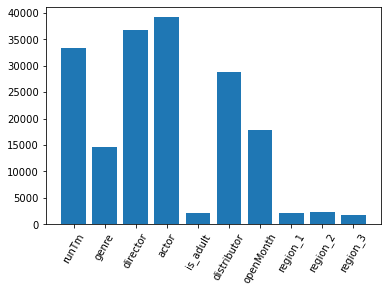

In [23]:
importance = lgbm_clf.feature_importances_

for i, v in enumerate(importance):
    print('Feature: %s, Score: %.5f' %(X_train.columns[i],v))

plt.bar(X_train.columns, importance)
plt.xticks(rotation=60)
plt.show()

## 7. Boosting

In [24]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings

warnings.filterwarnings('ignore')

In [33]:
start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=13, n_estimators=100, learning_rate=0.01, max_depth=4)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_train_pd = gb_clf.predict(X_train)

print("ACC : ", accuracy_score(y_test, gb_pred))
print("Fit time : ", time.time() - start_time)

ACC :  0.7399608227228207
Fit time :  8.627922058105469


In [34]:
print("Train Accuracy : ", accuracy_score(y_train, gb_train_pd))
print("Test Accuracy : ", accuracy_score(y_test, gb_pred))

Train Accuracy :  0.7821158690176322
Test Accuracy :  0.7399608227228207


In [49]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators' : [100, 300],
    'learning_rate' : [0.01, 0.1]
}

start_time = time.time()
grid = GridSearchCV(gb_clf, param_grid=params, cv=2, verbose=1, n_jobs=-1)
grid.fit(X_train, y_train)
grid_pred = grid.predict(X_test)
grid_train_pd = grid.predict(X_train)

print("ACC : ", accuracy_score(y_test, grid_pred))
print("Fit time : ", time.time() - start_time)

Fitting 2 folds for each of 4 candidates, totalling 8 fits
ACC :  0.7428991185112634
Fit time :  49.838501930236816


In [50]:
print("Train Accuracy : ", accuracy_score(y_train, grid_train_pd))
print("Test Accuracy : ", accuracy_score(y_test, grid_pred))

Train Accuracy :  0.8259865659109992
Test Accuracy :  0.7428991185112634


In [37]:
y_train_copy = y_train.copy()
y_test_copy = y_test.copy()

y_train_copy -= 1
y_test_copy -= 1

In [38]:
from xgboost import XGBClassifier

start_time = time.time()
xgb = XGBClassifier(n_estimators=100, learning_rate=0.01, max_depth=3)
xgb.fit(X_train.values, y_train_copy.values)

print("Accuracy : ", accuracy_score(y_test_copy.values, xgb.predict(X_test.values)))
print('Fit time : ', time.time() - start_time)

Accuracy :  0.7311459353574926
Fit time :  1.499100923538208


In [39]:
print("Train Accuracy : ", accuracy_score(y_train_copy.values, xgb.predict(X_train.values)))
print("Test Accuracy : ", accuracy_score(y_test_copy.values, xgb.predict(X_test.values)))

Train Accuracy :  0.7531486146095718
Test Accuracy :  0.7311459353574926


In [43]:
from sklearn.ensemble import AdaBoostClassifier

start_time = time.time()
abc = AdaBoostClassifier(n_estimators=100, base_estimator= dt_clf ,learning_rate=0.1)
abc.fit(X_train.values, y_train.values)
abc_pred = abc.predict(X_test)
abc_train_pd = abc.predict(X_train)

print("Accuracy : ", accuracy_score(y_test.values, abc_pred))
print('Fit time : ', time.time() - start_time)

Accuracy :  0.6684622918707149
Fit time :  2.3444430828094482


In [44]:
print("Train Accuracy : ", accuracy_score(y_train, abc_train_pd))
print("Test Accuracy : ", accuracy_score(y_test, abc_pred))

Train Accuracy :  0.9321998320738875
Test Accuracy :  0.6684622918707149


---

## 8. Conclusion

- 세번째 시도에서 중앙값 치환으로 진행했다면, 이번 시도는 평균값으로 진행하였는데, 전체적으로 중앙 값 치환이 더 적합한 형상을 보인다.